<a href="https://colab.research.google.com/github/Seblao/Machine-Learning/blob/main/4.1%20ML%20pipeline%20%E2%80%93%20Standardiser%20les%20Donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

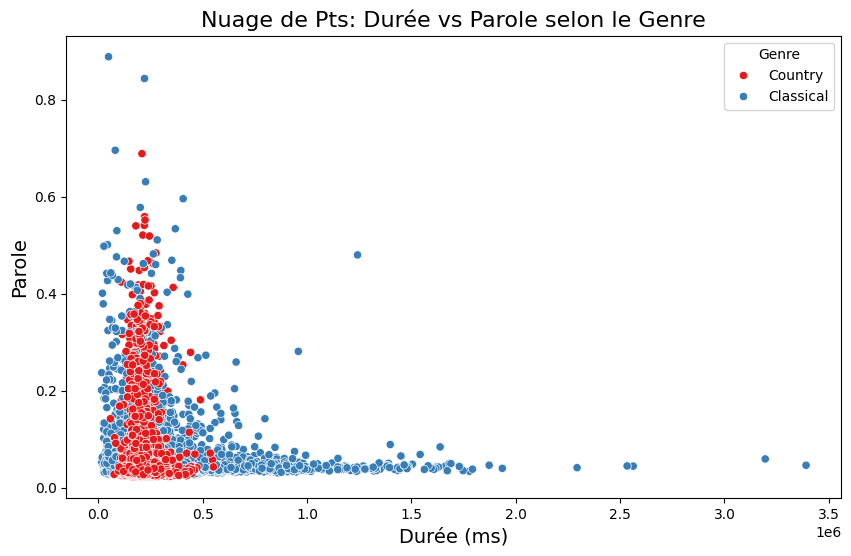

In [ ]:
# Créer 1 nuage de pts :
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_zoom, x='duration_ms', y='speechiness', hue='genre', palette='Set1')

plt.title('Nuage de Pts: Durée vs Parole selon le Genre', fontsize=16)
plt.xlabel('Durée (ms)', fontsize=14)
plt.ylabel('Parole', fontsize=14)

plt.legend(title='Genre')
plt.show()

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [ ]:
# Your code here :

# Défini X (v.a indpdtes) et y (v.a cible) :
X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre']

# Divise les données en ensble d'entraînemt et de test (80 % train, 20 % test) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialise les 3 mdèles :
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

# Liste des mdèles pr itérat° :
models = [log_reg, knn, tree]
model_names = ['Régress° Logistiq', 'KNN', 'Arbre de Décis°']

# Entraîne et évalue chaq mdèle :
for model, name in zip(models, model_names):

    # Entraîne le mdèle :
    model.fit(X_train, y_train)

    # Prédict° sur les ensbles d'entraînemt et de test :
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calcule le score de précis° pr l'entraînemt et le test :
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Afficher les résultats
    print(f"{name} :")
    print(f"  - Précis° d'entraînemt : {train_accuracy:.4f}")
    print(f"  - Précis° de test : {test_accuracy:.4f}")
    print('-' * 50)

Régress° Logistiq :
  - Précis° d'entraînemt : 0.6587
  - Précis° de test : 0.6685
--------------------------------------------------
KNN :
  - Précis° d'entraînemt : 0.7986
  - Précis° de test : 0.7056
--------------------------------------------------
Arbre de Décis° :
  - Précis° d'entraînemt : 0.9997
  - Précis° de test : 0.7344
--------------------------------------------------



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [ ]:
# Your code here :

# Initialise le scaler :
scaler = StandardScaler()

# Ajuste le scaler sur X_train et trsfrme X_train et X_test :
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise les 3 mdèles :
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

# Liste des mdèles pr itérat° :
models = [log_reg, knn, tree]
model_names = ['Régression Logistique', 'KNN', 'Arbre de Décision']

# Entraîne et évalue chaq mdèle avec les données nrmalisées :
for model, name in zip(models, model_names):

    # Entraîne le mdèle avec les données nrmalisées :
    model.fit(X_train_scaled, y_train)

    # Prédict° sur les ensbles d'entraînemt et de test :
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    # Calcule le score de précis° pr l'entraînemt et le test :
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Affiche les résultats :
    print(f"{name} avec données normalisées :")
    print(f" - Précis° d'entraînemt : {train_accuracy:.4f}")
    print(f"  - Précis° de test : {test_accuracy:.4f}")
    print('-' * 50)

Régression Logistique avec données normalisées :
 - Précis° d'entraînemt : 0.6586
  - Précis° de test : 0.6694
--------------------------------------------------
KNN avec données normalisées :
 - Précis° d'entraînemt : 0.8356
  - Précis° de test : 0.7748
--------------------------------------------------
Arbre de Décision avec données normalisées :
 - Précis° d'entraînemt : 0.9997
  - Précis° de test : 0.7341
--------------------------------------------------


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.

Conclus° :

- L'arbre de décis° reste inchangé après la standardisat°.
- La régress° logistiq est également pratiquemt inchangé.
- Le KNN a de meilleurs résultats après la standardisat°.

- On pt rappeler q la standardisat° est tjrs bonne en prétraitemt, avt les classificat° et régress° en ML.
- Au pire, elle ne change rien. Au mieux, elle améliore les résultats.